Assignment1: Perform ETL operation on the given data



In [1]:
# for ignoring Warnings 
import warnings
warnings.filterwarnings('ignore')
# Setting precision level to 4 to show only upto 4 decimal points
import pandas as pd
pd.option_context('display.precision', 2)

Task1:Load both stocks data1 from the given healthdrink file

In [2]:
#loding data from excel file to the data frame using pandas.
import pandas as pd

healthdrink_no_df=pd.read_excel('healthdrink.xlsx','healthdrink_no')
print(healthdrink_no_df)

healthdrink_yes_df=pd.read_excel('healthdrink.xlsx','healthdrink_yes')
print(healthdrink_yes_df)


    height_increase
0               5.3
1               9.0
2               5.7
3               5.5
4               5.4
..              ...
75              4.4
76              5.3
77              6.2
78              7.4
79              4.2

[80 rows x 1 columns]
    height_increase
0               8.6
1               5.8
2              10.2
3               8.5
4               6.8
..              ...
74              6.5
75              8.1
76              7.2
77              8.8
78              9.8

[79 rows x 1 columns]


Task2:Identify the feature vector from the given file, and write the python code to keep that only in the data frame


In [1]:
#identifing the feature vector from the given data.
import pandas as pd

healthdrink_yes_df=pd.read_excel('healthdrink.xlsx','healthdrink_yes')
print(healthdrink_yes_df)  #data frame is printed

feature_vector_column = healthdrink_yes_df['height_increase']
print(feature_vector_column) # feature vector is printed

beml_df=pd.read_csv('BEML.csv')
feature_vector_column=beml_df[['Date','Close']]
print(feature_vector_column) # Date and Close are feature vector


    height_increase
0               8.6
1               5.8
2              10.2
3               8.5
4               6.8
..              ...
74              6.5
75              8.1
76              7.2
77              8.8
78              9.8

[79 rows x 1 columns]
         Open    Close
0     1121.00  1135.60
1     1146.80  1134.60
2     1140.00  1139.60
3     1142.00  1144.15
4     1156.00  1144.05
...       ...      ...
1734   965.00   950.25
1735   960.70   975.70
1736   980.75   974.40
1737   977.10   986.05
1738   986.00  1000.60

[1739 rows x 2 columns]


Task3: Perform data transformation operation on time variable

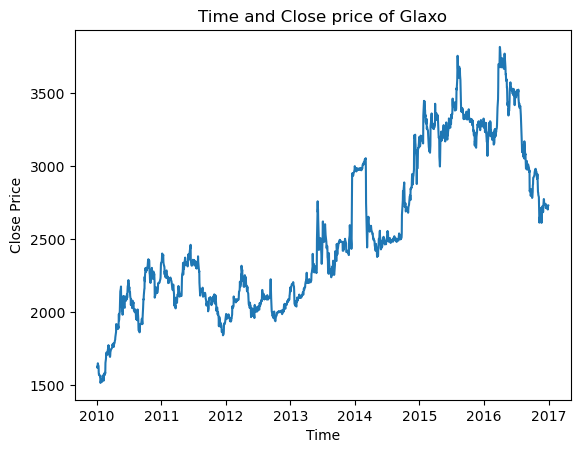

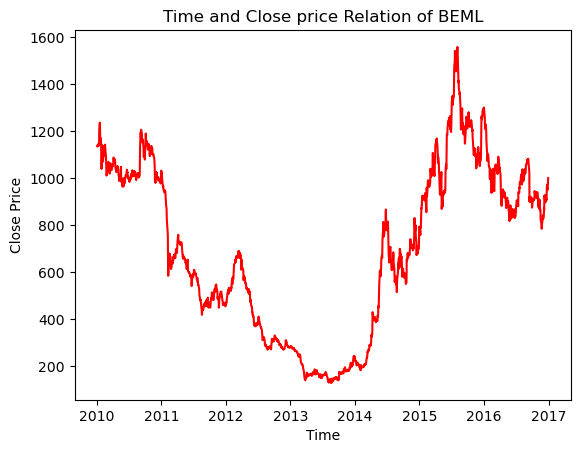

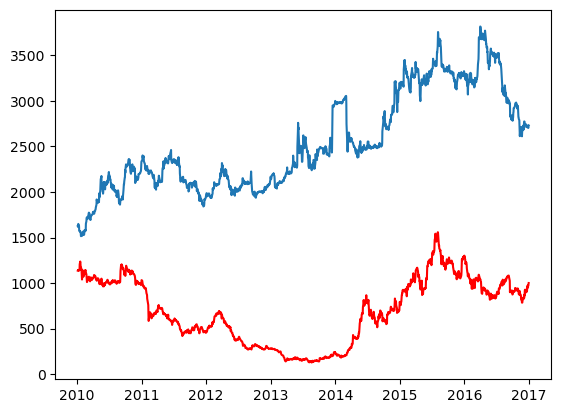

C:\Users\HP\AppData\Local\Temp\ipykernel_1180\3280036676.py:29: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(beml_df.Close,label='Beml')
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\AppData\Local\Temp\ipykernel_1180\3280036676.py:30: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibi

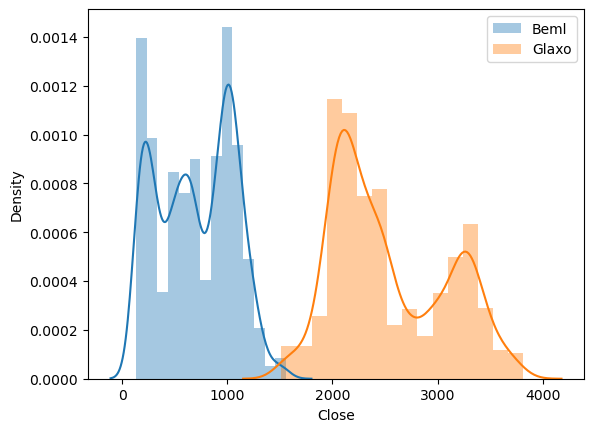

In [1]:
#loding the data in the graphical format.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

beml_df=pd.read_csv('BEML.csv')
glaxo_df=pd.read_csv('GLAXO.csv')

#Converting time to index 
beml_df=beml_df.set_index(pd.DatetimeIndex(beml_df['Date']))
glaxo_df=glaxo_df.set_index(pd.DatetimeIndex(glaxo_df['Date']))

#line graph close and time plot for glaxo data
plt.plot(glaxo_df.Close)
plt.title('Time and Close price of Glaxo')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.show()

#line graph close and time plot for Beml Data
plt.plot(beml_df.Close,color='r')
plt.title('Time and Close price Relation of BEML')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.show()

#combined plot of the both the close, time data. 
plt.plot(glaxo_df.Close)
plt.plot(beml_df.Close,color='r')
plt.title('Time and Close price of Both the Stocks(Glaxo,Beml) ')
plt.show()

#histograph of the close data showing how the data is distributed 
sn.distplot(beml_df.Close,label='Beml')
sn.distplot(glaxo_df.Close,label='Glaxo')
plt.legend()




Tasks4:Calculate gain of Close price of both stock

In [12]:
#Calculating the gain of the stock using the close price data.
 #1) the first value of the of the gain is always NaNa as it required the ((close(today)-close(previousday))/(close(today))). 

import pandas as pd

beml_df=pd.read_csv('BEML.csv')
glaxo_df=pd.read_csv("GLAXO.csv")

beml_df['Gain']=beml_df.Close.pct_change(periods=1)  #((close(today)-close(previousday))/(close(today)))
glaxo_df['Gain']=glaxo_df.Close.pct_change(periods=1)


print('Gain of BEML Stock: ',beml_df.Gain)
print('Gain of GLAXO Stock: ',glaxo_df.Gain)




0            NaN
1      -0.000881
2       0.004407
3       0.003993
4      -0.000087
          ...   
1734   -0.021924
1735    0.026782
1736   -0.001332
1737    0.011956
1738    0.014756
Name: Gain, Length: 1739, dtype: float64
0            NaN
1      -0.005444
2       0.013422
3       0.006225
4      -0.005398
          ...   
1734   -0.001283
1735   -0.007986
1736    0.000148
1737    0.009529
1738    0.000697
Name: Gain, Length: 1739, dtype: float64


Task5: identify Null in the gain of close variable and remove null

In [16]:
print("Total no. of null present in Beml Gain Column: ",beml_df['Gain'].isnull().sum())

print("Total no. of null present in Glaxo Gain Column: ",glaxo_df['Gain'].isnull().sum())

glaxo_df = glaxo_df.dropna()  # Droping all null values is also called data cleaning
beml_df= beml_df.dropna()

print(glaxo_df.Gain)
print(beml_df.Gain)

Total no. of null present in Beml Gain Column:  1
Total no. of null present in Glaxo Gain Column:  1


Task6: Make a new detination file(NewGlaxo.csv) and load the created data frame

In [ ]:
#all the data of the data frame is been loaded to the given file.  
destination_file1='NewGlaxo.csv'
destination_file2='NewBeml.csv'

glaxo_df.to_csv(destination_file1,index=False)
beml_df.to_csv(destination_file2,index=False)
print("ETL process Complete.")
